# Distance calculations and contact map plotting

## Content

This notebooks demonstrates how to calculate distances and contacts in PDB structures, and how to compare evolutionary couplings to them.

## Tutorial

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob 
from evcouplings.couplings import read_raw_ec_file
from evcouplings.compare import (
    PDB, DistanceMap, SIFTS, intra_dists,
    multimer_dists, coupling_scores_compared
)

from evcouplings.visualize import plot_contact_map, plot_context

### Compute distances from 3D structures

First, we load index mapping information from the SIFTS database. If the two files in the constructor do not exist, they will be created automatically by fetching and processing the data from SIFTS (this may take a while).

In [3]:
s = SIFTS("/n/groups/marks/databases/SIFTS/pdb_chain_uniprot_plus_current.o2.csv", "/n/groups/marks/databases/SIFTS/pdb_chain_uniprot_plus_current.o2.fasta")

#### By homology search

Finds structures by running a sequence alignment against the sequences of proteins in the PDB (these are the corresponding Uniprot sequences, not the SEQRES sequences). reduce_chains=True will only keep one chain per PDB ID (set to False if interested in homomultimeric contacts).

In [4]:
selected_structures = s.by_alignment(
    reduce_chains=True, sequence_id="ANK1_HUMAN", region=(43, 106),
    jackhmmer="/n/groups/marks/pipelines/evcouplings/software/hmmer-3.1b2-linux-intel-x86_64/binaries/jackhmmer",
)

selected_structures.hits

/n/groups/marks/software/anaconda_o2/envs/evcouplings_stable/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,pdb_id,alignment_id,pdb_chain,uniprot_ac,uniprot_id,alignment_start,alignment_end,bitscore,e_value,resseq_start,resseq_end,coord_start,coord_end,uniprot_start,uniprot_end,uniprot_id_,overlap,mapping_index,grouped_segments
0,4rlv,evsp|Q01484|ANK2_HUMAN/62-125,A,Q01484,ANK2_HUMAN,62,125,67.5,8.600000e-19,65,853,2028,2816,28,816,ANK2_HUMAN,64,24,False
1,4rly,evsp|Q01484|ANK2_HUMAN/62-125,A,Q01484,ANK2_HUMAN,62,125,67.5,8.600000e-19,31,320,2029,2318,29,318,ANK2_HUMAN,64,25,True
2,5y4d,evsp|Q01484|ANK2_HUMAN/62-125,A,Q01484,ANK2_HUMAN,62,125,67.5,8.600000e-19,66,720,2028,2682,28,682,ANK2_HUMAN,64,26,True


#### Compute distance maps

Based on the selected hits, we can compute distance maps for all structures. These are then aggregated into one distance map by minimizing across the distances for any residue pairs.

*Note there is also a function for comparing inter-chain distances, e.g. in hetero-complexes, inter_dists(), which this tutorial currently does not cover.*

In [5]:
distmap_intra = intra_dists(selected_structures)
distmap_multimer = multimer_dists(selected_structures)

(64, 64)


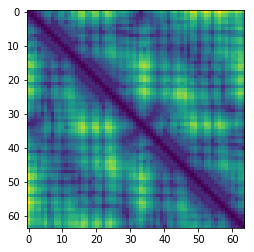

In [6]:
plt.imshow(distmap_intra.dist_matrix)
print(distmap_intra.dist_matrix.shape)

### Plot and compare evolutionary couplings to distance maps

#### Load evolutionary couplings

Here, we load ECs from an _ECs.txt file:

In [7]:
ecs_files = glob.glob('/home/as974/ada/repeatsProject/PF00023/cOutput/*ECscores*.txt')
ecs_files

['/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_heniECscores.txt',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_ECscores_no_correction.txt',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_ECscores_ones.txt',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_ECscores.txt']

/n/groups/marks/software/anaconda_o2/envs/evcouplings_stable/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/n/groups/marks/software/anaconda_o2/envs/evcouplings_stable/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/n/groups/marks/software/anaconda_o2/envs/evcouplings_stable/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


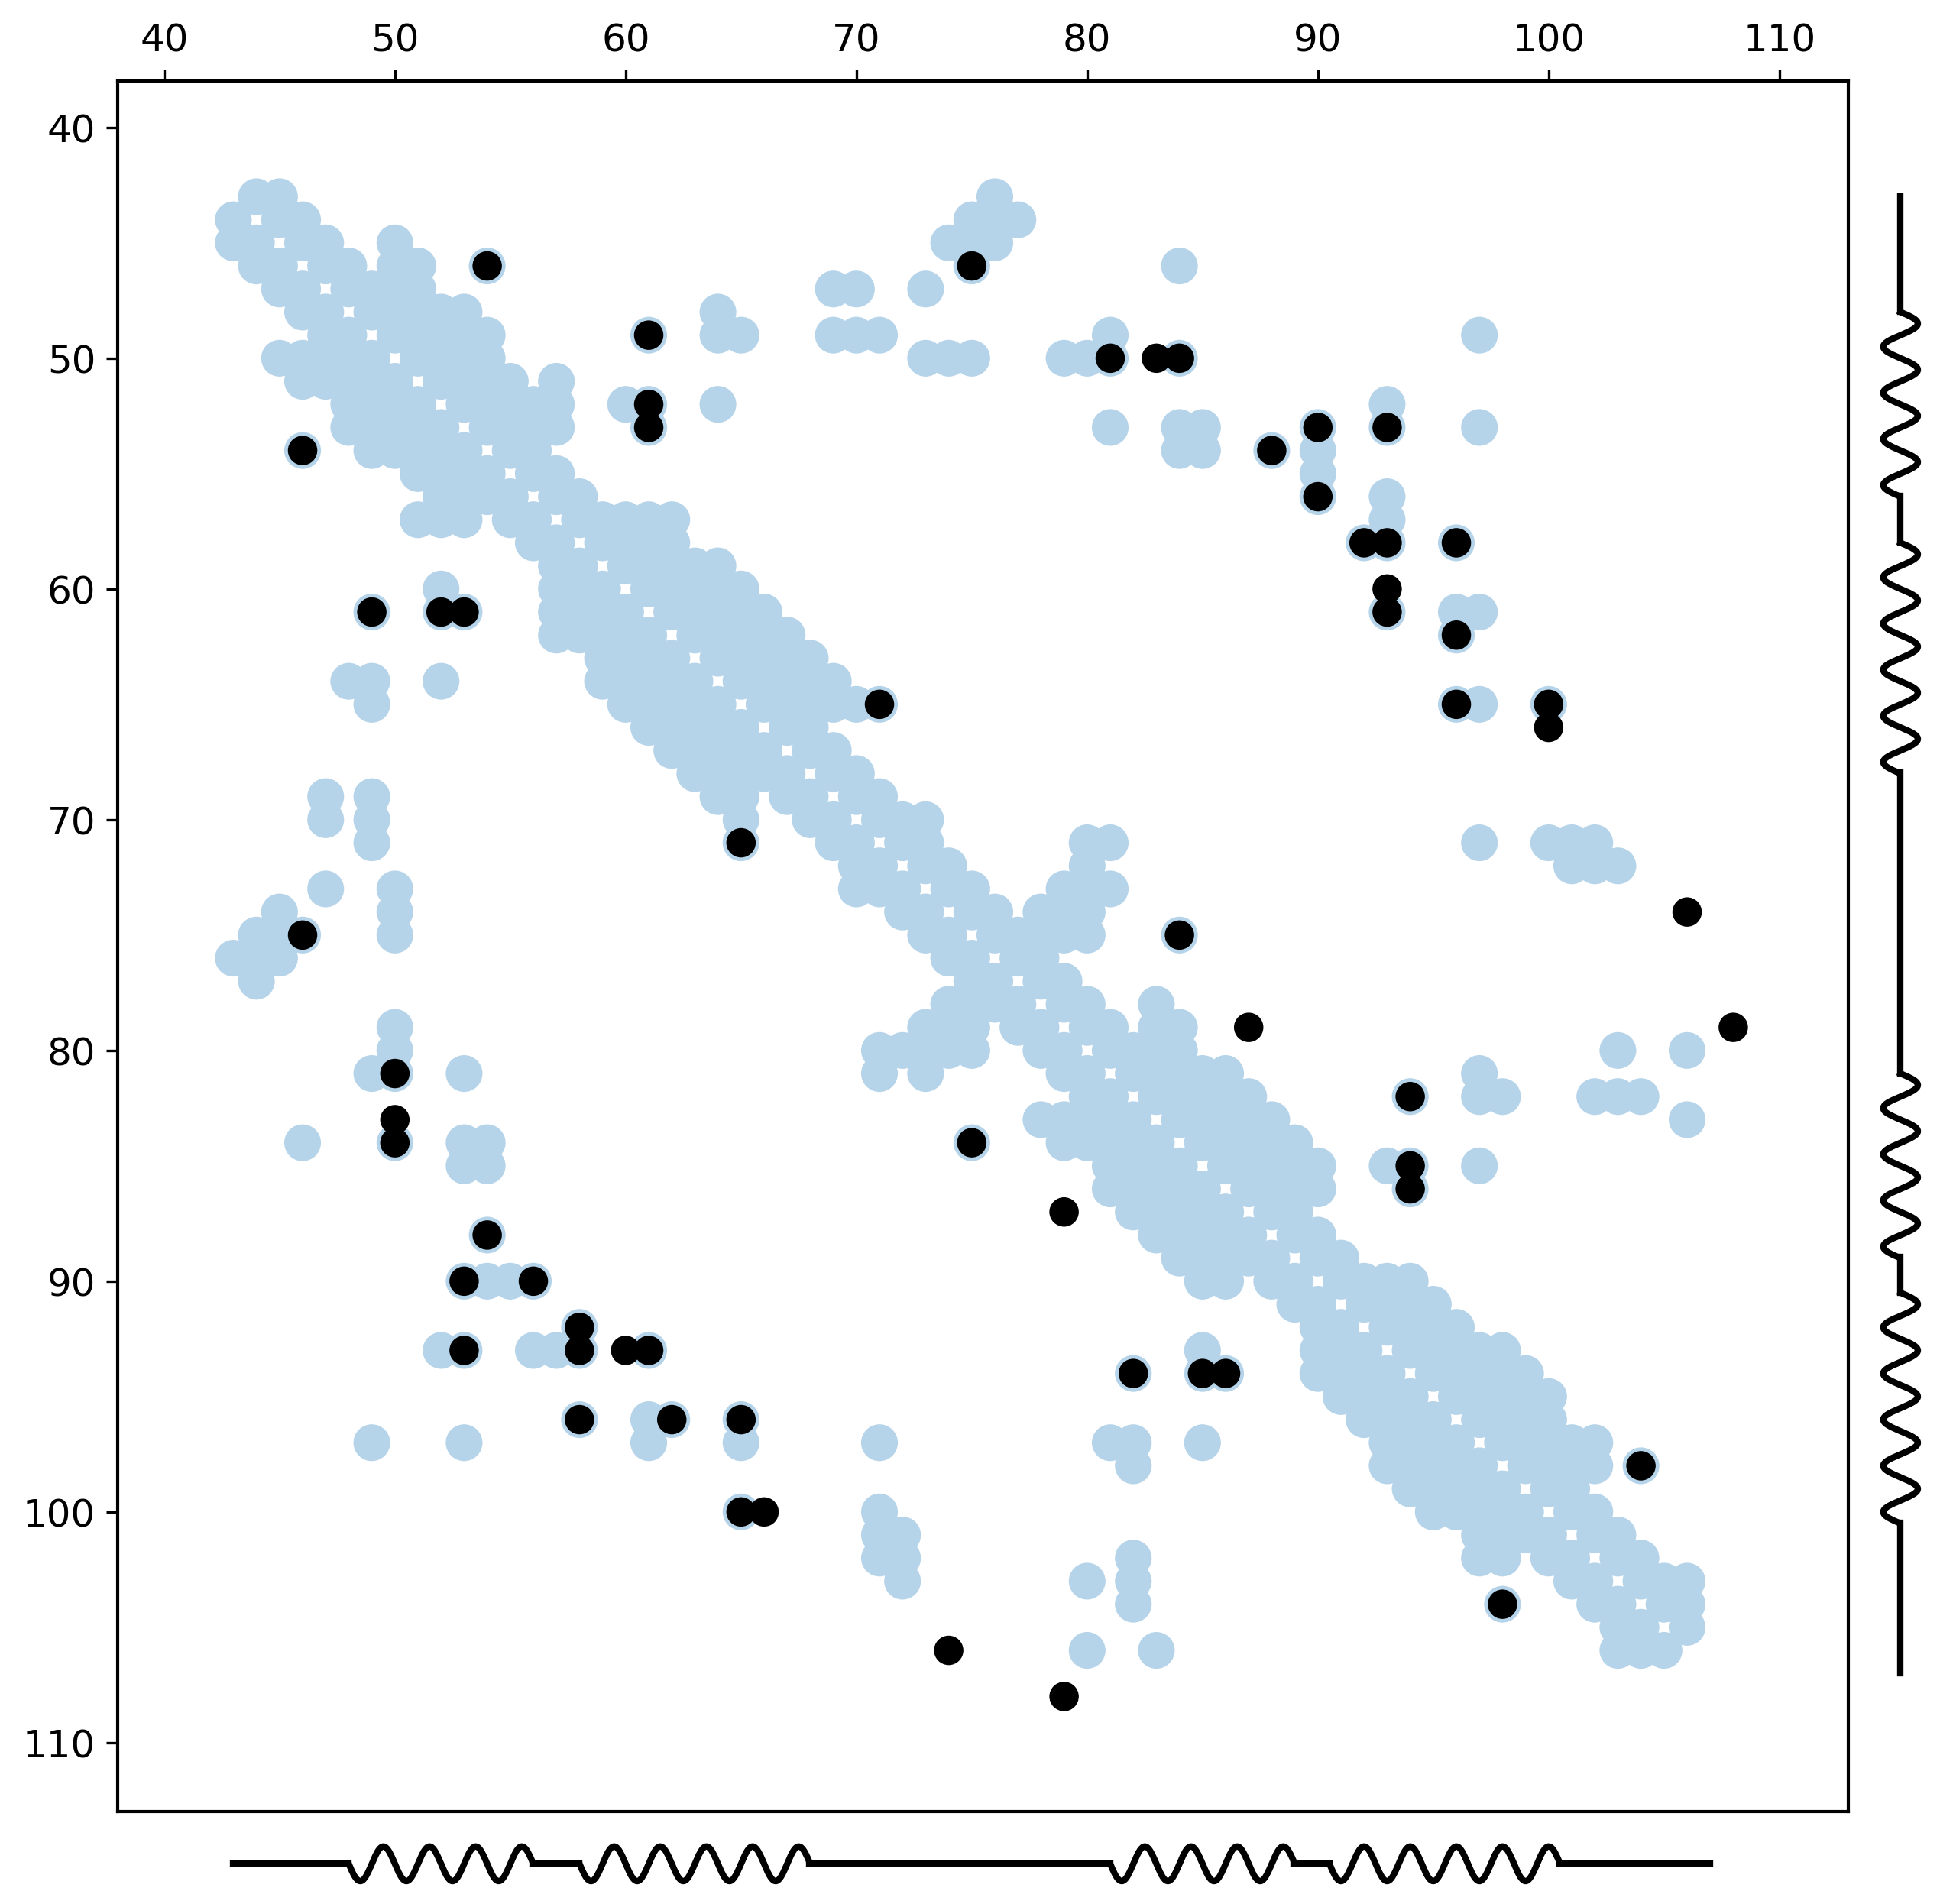

In [18]:
ecs = read_raw_ec_file(ecs_files[3])
ecs['i'] += 43
ecs['j'] += 43
ecs['i'][ecs['i']>32+43] += 1
ecs['j'][ecs['j']>32+43] += 1

# show these many long-range ECs
longrange_ecs = ecs.query("abs(i - j) > 5")
num_ecs = 30
show_ecs = longrange_ecs.iloc[:num_ecs]

with plot_context("Arial"):
    plt.figure(figsize=(10, 10))
    
    plot_contact_map(
        show_ecs, distmap_intra, distmap_multimer
    )

/n/groups/marks/software/anaconda_o2/envs/evcouplings_stable/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/n/groups/marks/software/anaconda_o2/envs/evcouplings_stable/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/n/groups/marks/software/anaconda_o2/envs/evcouplings_stable/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


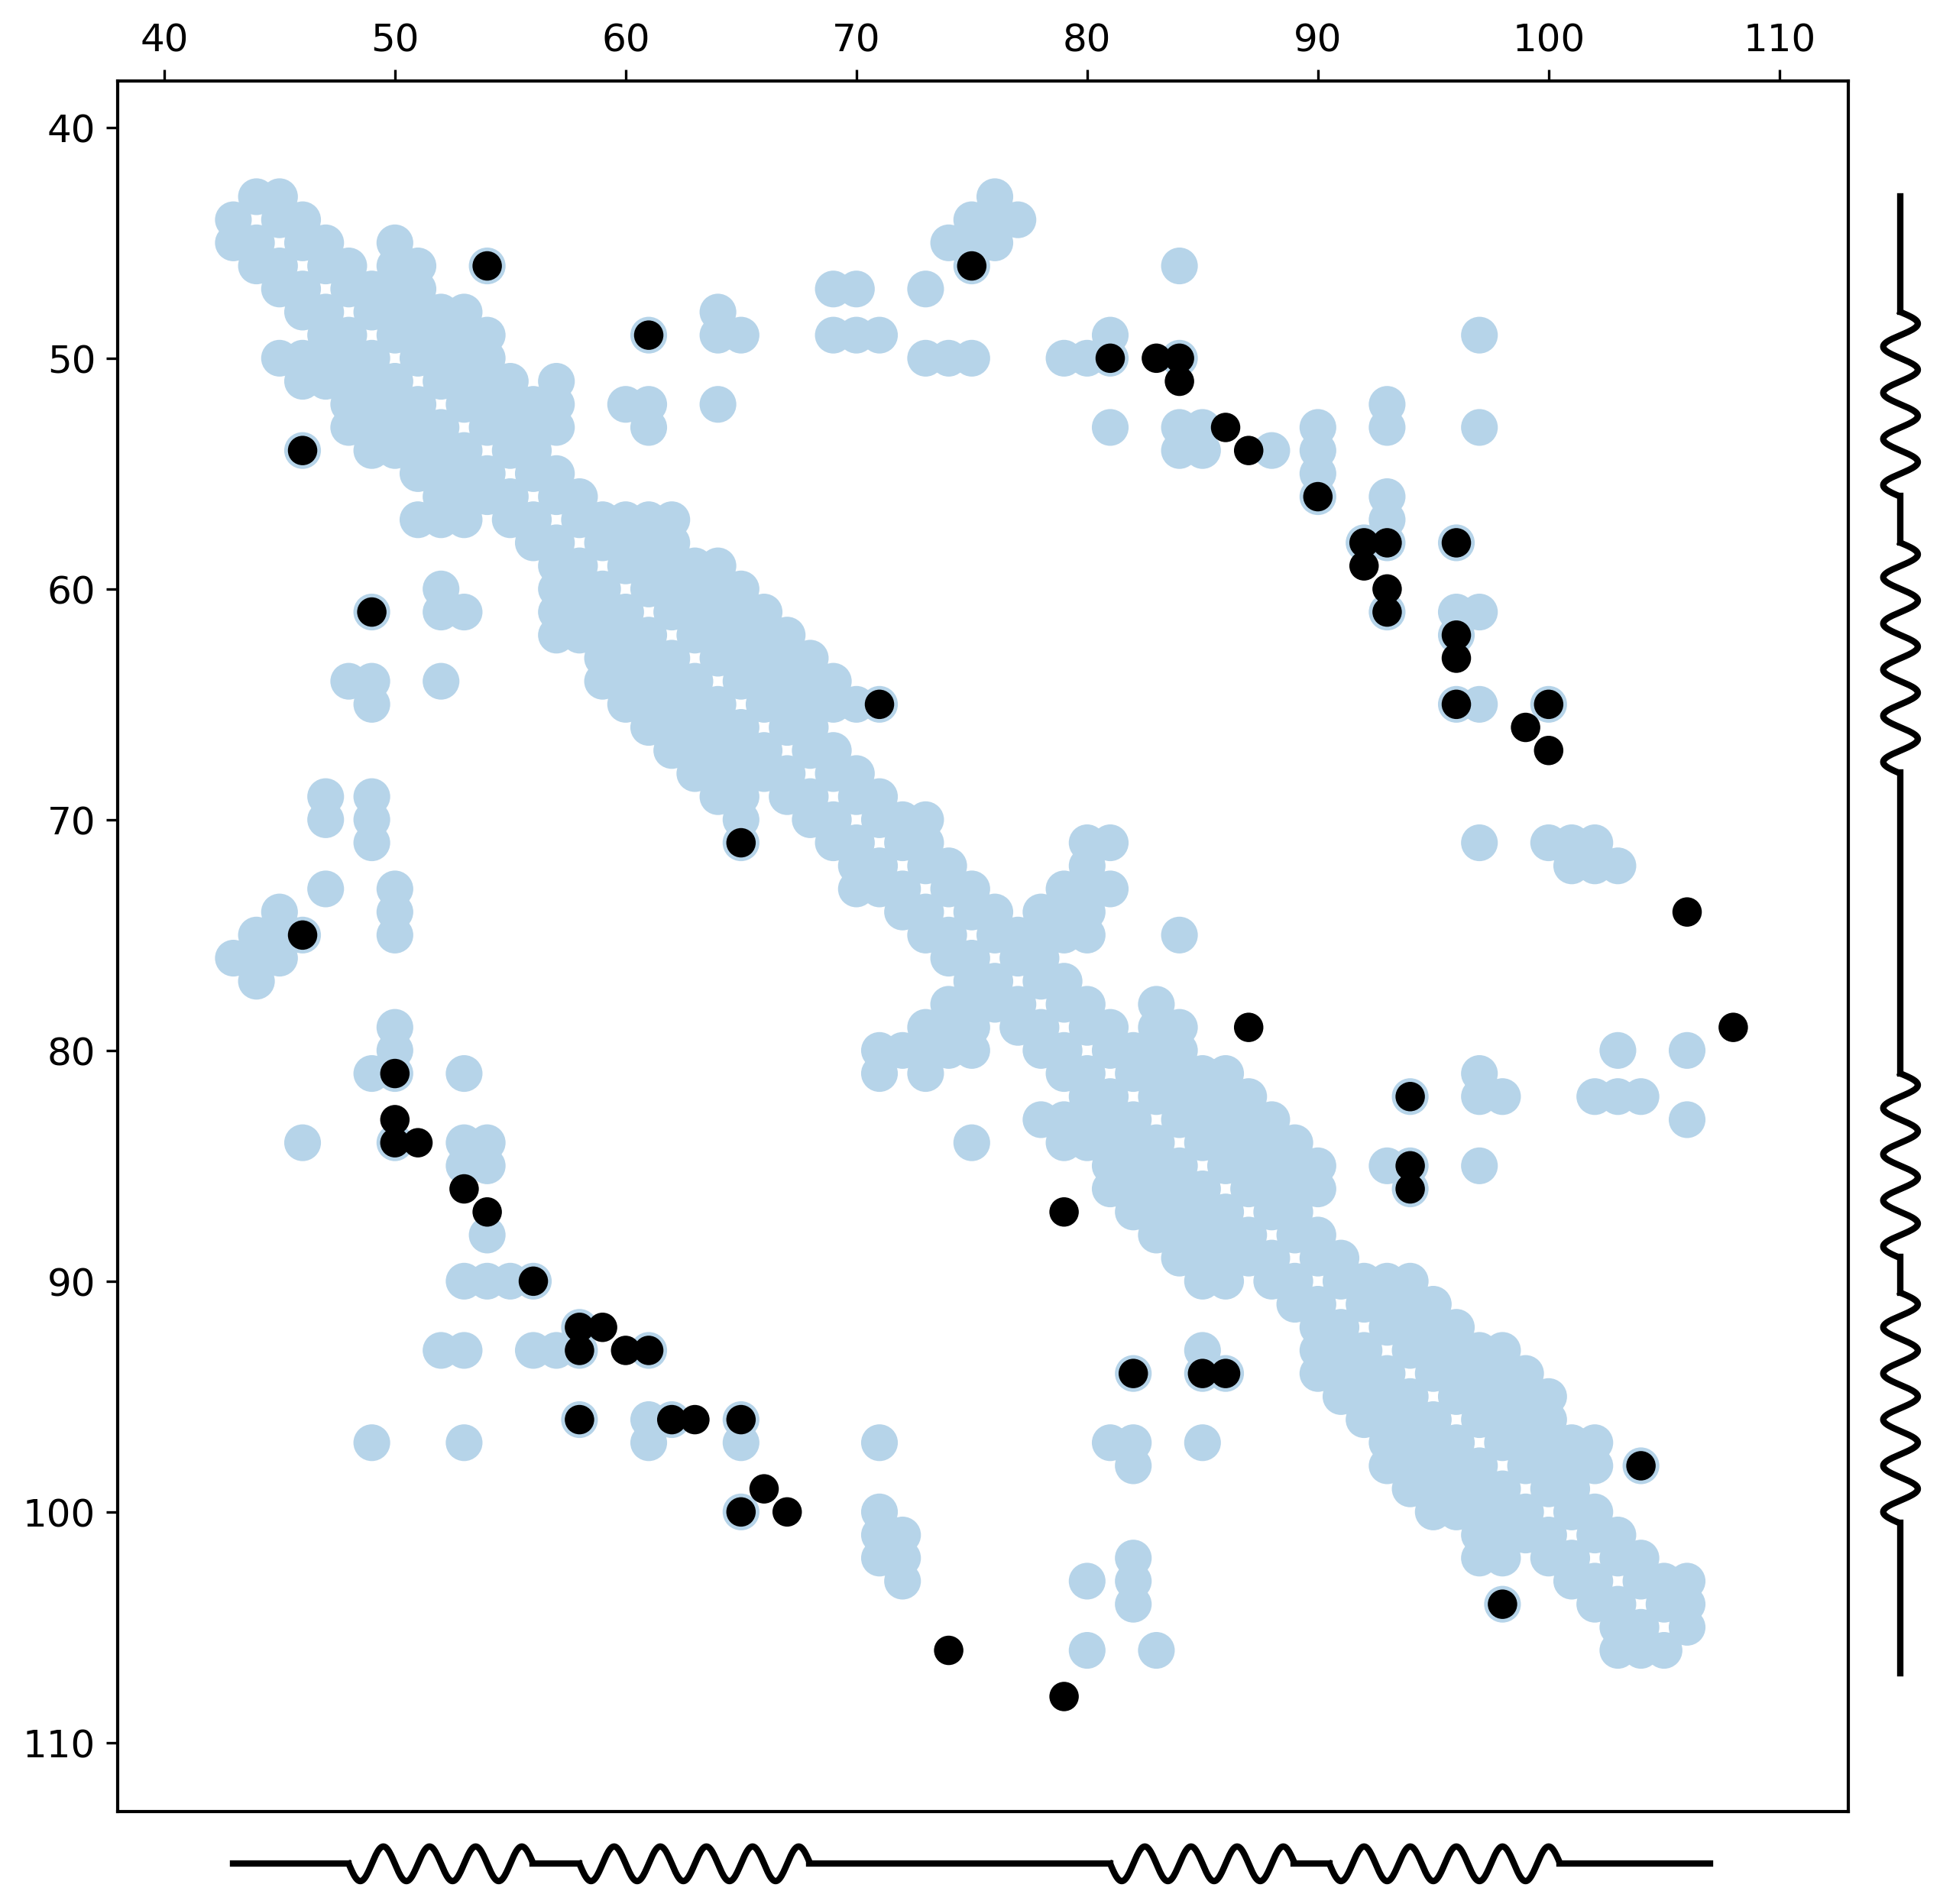

In [19]:
ecs = read_raw_ec_file(ecs_files[2])
ecs['i'] += 43
ecs['j'] += 43
ecs['i'][ecs['i']>32+43] += 1
ecs['j'][ecs['j']>32+43] += 1

# show these many long-range ECs
longrange_ecs = ecs.query("abs(i - j) > 5")
num_ecs = 30
show_ecs = longrange_ecs.iloc[:num_ecs]

with plot_context("Arial"):
    plt.figure(figsize=(10, 10))
    
    plot_contact_map(
        show_ecs, distmap_intra, distmap_multimer
    )
